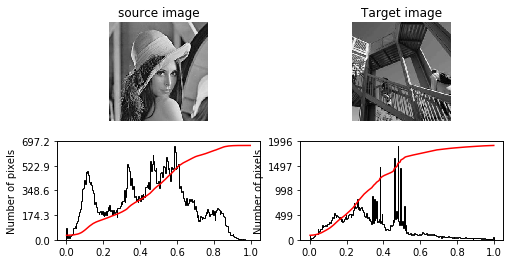

In [17]:
import numpy as np
import scipy
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_blocks
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import feature
from skimage.transform import warp, AffineTransform
from skimage import io
%matplotlib inline
from PIL import Image
from skimage import img_as_float
from skimage import data
from skimage.transform import pyramid_gaussian
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure



def histogram_match(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    plt.figure(figsize=(40,40))
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
#     ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
#     ax_hist.set_xlabel('Pixel intensity')
#     ax_hist.set_xlim(0, 1)
#     ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

#########################################
# Load an example image
source =io.imread('lena.jpg')
source=skimage.color.rgb2gray(source)
source = img_as_float(source)

target =io.imread('stairs.jpg')
target=skimage.color.rgb2gray(target)
target = img_as_float(target)

# histogram_match(source, target)
##########################################


# Display results

f, axes = plt.subplots(2, 2, figsize=(8, 4))

ax_img, ax_hist, ax_cdf = histogram_match(source, axes[:, 0])
ax_img.set_title('source image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = histogram_match(target, axes[:, 1])
ax_img.set_title('Target image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
plt.show()
